# Import Necessary Libraries

In [22]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
import time 
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from matplotlib import markers
markersList = list(markers.MarkerStyle().markers.keys())

In [23]:
mergedFrame1000 = pd.read_csv("../DataSet/engineeredFrame.csv")
moreThanOnePercentColumns = pd.read_csv("../DataSet/filterFrame.csv")
moreThanOnePercentColumns

/Users/benjamindeplus/.local/share/virtualenvs/OlistC-zOM6riVT/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (2,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,columns,type,filledRatio,nbValues,isFilter
0,customer_id,object,100.000,83556,False
1,returningCustomers,int64,100.000,2,True
2,review_score,int64,100.000,5,True
3,review_creation_date,object,100.000,620,False
4,customer_unique_id,object,100.000,81072,False
5,seller_zip_code_prefix,int64,100.000,1017,False
6,seller_city,object,100.000,335,False
7,seller_state,object,100.000,20,False
8,customer_unique_id_int,int64,100.000,81072,False
9,nbOrders,int64,100.000,8,True


In [24]:
filterC = list(moreThanOnePercentColumns[moreThanOnePercentColumns["isFilter"] == True]["columns"].values)
print(filterC)

['returningCustomers', 'review_score', 'nbOrders', 'orderStatusBool', 'NbReviews', 'avgReviewScore', 'year', 'orderLateBool', 'seller_stateEnc', 'payment_typeEnc', 'customer_stateEnc', 'order_statusEnc', 'price', 'product_category_nameEnc', 'payment_sequential', 'order_delivery_length', 'orderLateInDays']


# Data Standardisation for dataset

In [25]:
X_delivered = mergedFrame1000[mergedFrame1000["order_status"] == "delivered"]
X = mergedFrame1000.dropna().filter(items=filterC).values
print(X)
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

[[ 0.  1.  1. ...  1. 60. 21.]
 [ 0.  1.  1. ...  1. 60. 21.]
 [ 0.  3.  1. ...  1. 23. -6.]
 ...
 [ 0.  5.  1. ...  1.  6. -8.]
 [ 0.  5.  1. ...  1.  3. -9.]
 [ 0.  5.  1. ...  1.  3. -5.]]


# MinMax version

In [26]:
minMaxEncoder = preprocessing.MinMaxScaler()
MinMaxEncoder = minMaxEncoder.fit(mergedFrame1000.dropna().filter(items=filterC).values)
X_MinMax = MinMaxEncoder.transform(mergedFrame1000.dropna().filter(items=filterC).values)

# PCA

In [29]:
from sklearn import decomposition
n_components = 7
pca = decomposition.PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=7)

In [30]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
print("components", pca.components_)

[0.20599025 0.16099706 0.09775759 0.09489915 0.08254969 0.06750985
 0.06605271]
0.77575630032797
components [[ 5.38635276e-01 -1.01721819e-01  5.42383577e-01  0.00000000e+00
   5.39240894e-01 -3.30682512e-01 -9.05239401e-03  4.54343669e-02
   2.01069005e-02  7.30087515e-03  1.11786255e-02  0.00000000e+00
  -8.20111036e-03  1.22316168e-02  2.33325460e-03  3.82704797e-02
   2.82378791e-02]
 [-1.16671605e-01 -4.28716602e-01 -1.32729343e-01  1.11022302e-16
  -1.30223553e-01 -3.35666269e-01 -3.32313948e-03  4.96890172e-01
   7.15120058e-03 -1.58936013e-02 -1.21071953e-01  0.00000000e+00
   5.11734966e-02 -1.00091769e-02  1.70013939e-02  4.80389981e-01
   3.99608777e-01]
 [ 2.40682637e-02  1.73028167e-01  3.41796150e-02  6.24500451e-17
   3.88524967e-02  1.49464308e-01 -5.10455080e-02  8.55585045e-02
  -3.20460444e-02  6.66094200e-01 -7.95269036e-02  0.00000000e+00
   7.77065775e-02 -1.16270804e-02  6.78894500e-01  1.06948143e-01
   7.06867750e-02]
 [ 9.45709709e-02  5.54261407e-01  1.276005

### Données projetées sur les composantes principales et colorée par classement state.

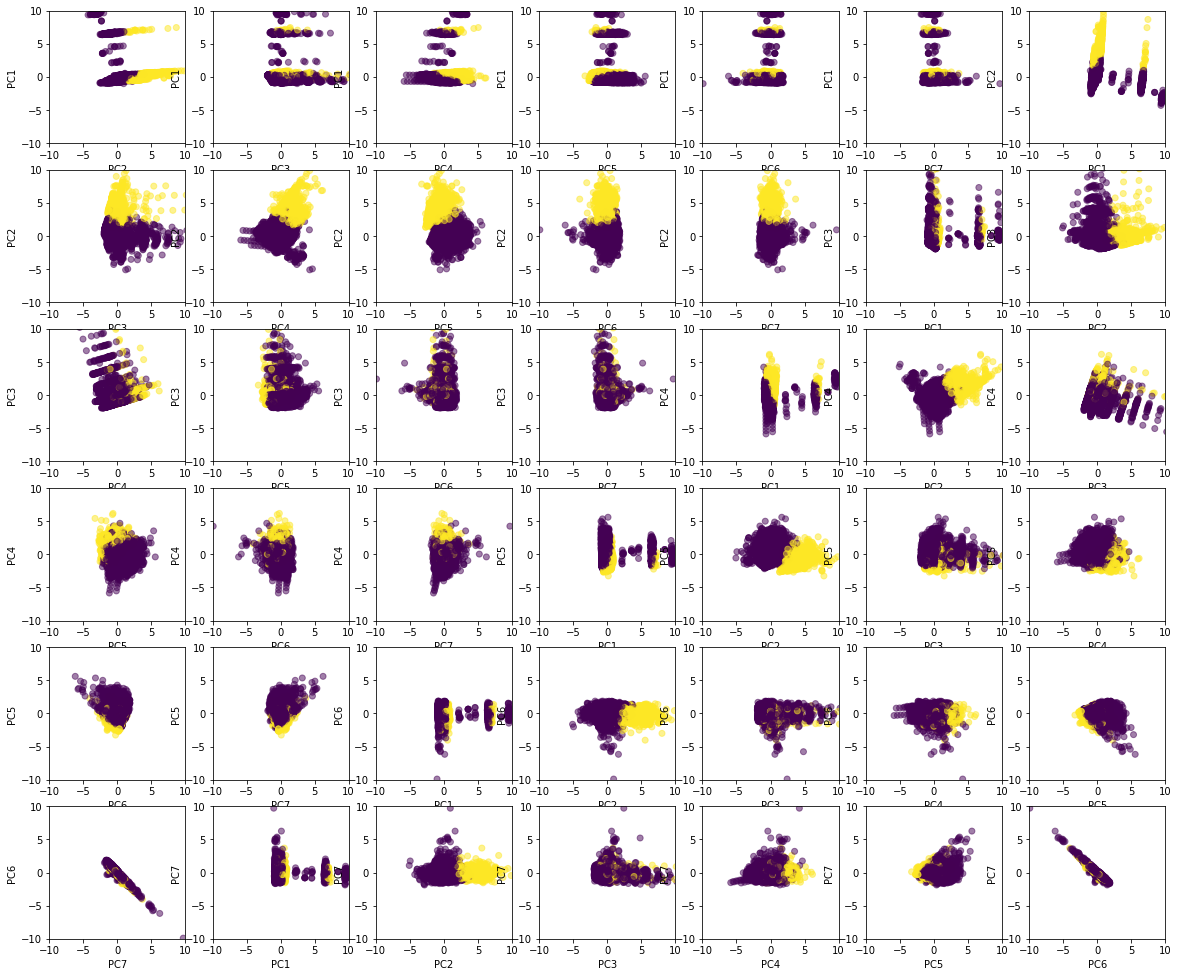

In [31]:
scatter = plt.figure(figsize=(20,20))
subplotIndex = 1



for c in range(n_components):

    # projeter X sur les composantes principales
    X__pca_projected = pca.transform(X_scaled)
    #ax = scatter.add_subplot(4, 3, (c+1))
    dimension = 'PC'+str(c+1)
    #print(dimension)
    # afficher chaque observation
    for cX in range(n_components):
        if cX != c:
            ax = scatter.add_subplot(n_components, n_components, subplotIndex)
            dimensionX = 'PC'+str(cX+1)
            ax.scatter(X__pca_projected[:, cX], X__pca_projected[:, c],  alpha=0.5, marker="o",
                # colorer en utilisant la variable 'Review Score
                #c=X_delivered.dropna().get('product_category_nameEnc'))
                c=X_delivered.dropna().get('orderLateBool'))

            ax.set_ylabel(dimension)
            ax.set_xlabel(dimensionX)
            ax.set_xlim([-10, 10])
            ax.set_ylim([-10, 10])
            subplotIndex = subplotIndex+1
    #ax.xlim([-5.5, 5.5])
    #ax.ylim([-4, 4])
    #ax.colorbar()
    #ax.show()

### Contribution de chaque variable aux composantes principales

(-0.7, 0.7)

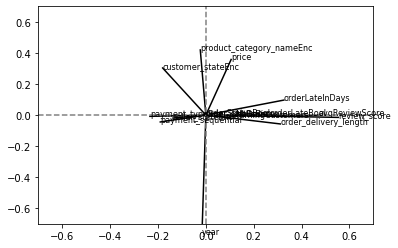

In [32]:
pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[3, :], pcs[6, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, filterC[i], fontsize='8')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

# NMF
### Only Positive Value

In [33]:
from sklearn import decomposition
nmf = decomposition.NMF(n_components=n_components, max_iter=10000)
nmf.fit(X_MinMax)

#print(nmf.explained_variance_ratio_)
#print(nmf.explained_variance_ratio_.sum())
print("components", nmf.components_)

/Users/benjamindeplus/.local/share/virtualenvs/OlistC-zOM6riVT/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


components [[0.00000000e+00 7.21813802e+00 3.11715860e-03 0.00000000e+00
  1.88009058e-03 6.23575129e+00 1.18276496e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.03609958e-01 0.00000000e+00
  4.31702253e-02 0.00000000e+00 0.00000000e+00 3.75353843e-03
  3.99775717e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.44314724e-01 2.54421619e+00 0.00000000e+00
  1.39613403e+00 0.00000000e+00 7.76470426e+00 0.00000000e+00
  3.52576775e-02 2.44718049e-01 0.00000000e+00 0.00000000e+00
  1.07213088e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.07184749e-03 2.38239017e-01 1.98207763e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 6.93531838e-03 0.00000000e+00
  1.19525976e-01 1.26189036e+01 0.00000000e+00 3.75452856e-01
  5.63622224e-01]
 [4.25780386e+00 3.00380198e+00 1.22619493e+00 0.00000000e+00
  1.20306205e+00 0.00000000e+00 1.77320853e+00 0.00000000e+00
  1.79617137e+00 1.15275629e-01 9.47874882e-01 0.00000000e+00
  3.0

### Données projetées sur les composantes principales et colorée par classement state.

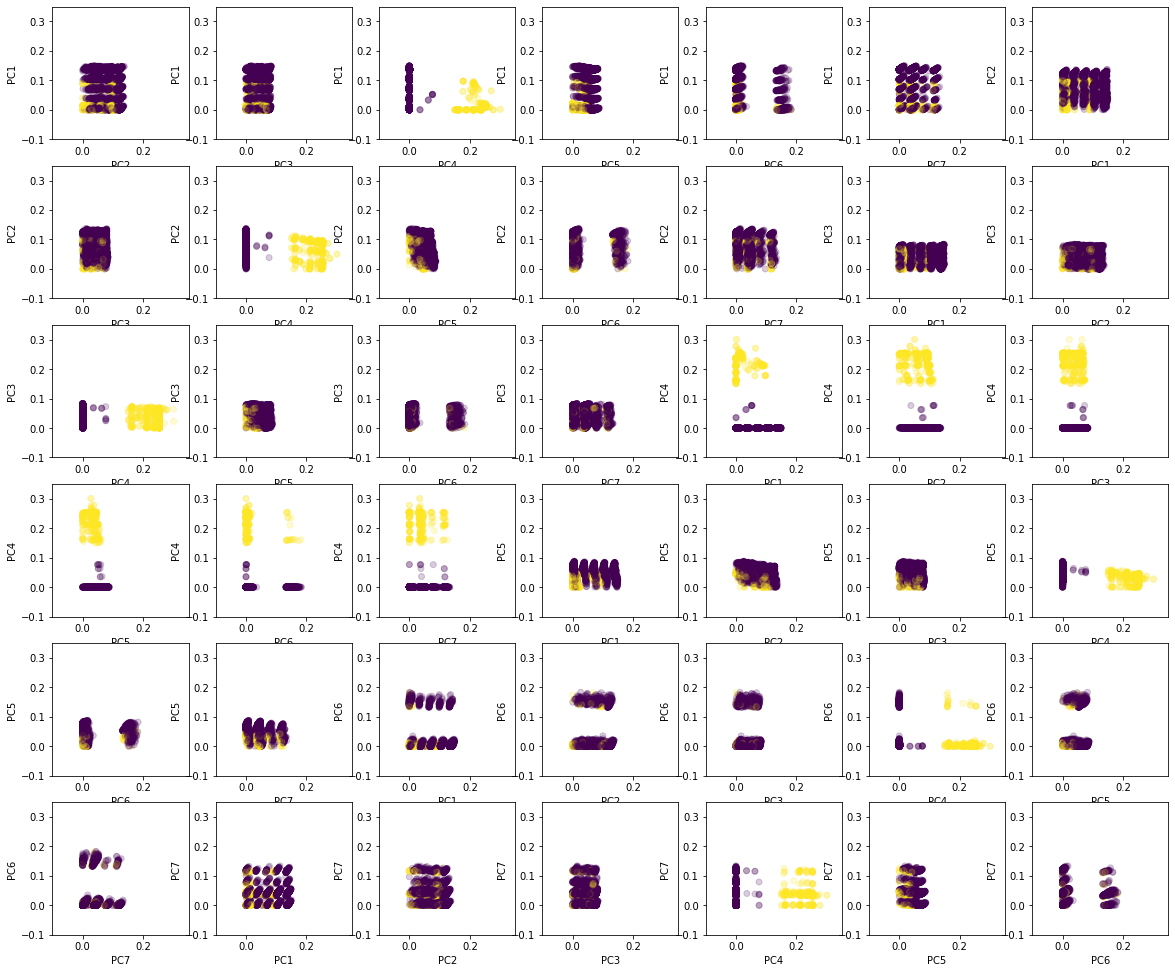

In [34]:
scatter = plt.figure(figsize=(20,20))
subplotIndex = 1
for c in range(n_components):

    # projeter X sur les composantes principales
    X_nmf_projected = nmf.transform(X_MinMax)
    #ax = scatter.add_subplot(4, 3, (c+1))
    dimension = 'PC'+str(c+1)
    #print(dimension)
    # afficher chaque observation
    for cX in range(n_components):
        if cX != c:
            ax = scatter.add_subplot(n_components, n_components, subplotIndex)
            dimensionX = 'PC'+str(cX+1)
            ax.scatter(X_nmf_projected[:, cX], X_nmf_projected[:, c],  alpha=0.2, marker="o",
                # colorer en utilisant la variable 'Review Score
                c=X_delivered.dropna().get('returningCustomers'))
                #c=X_delivered.dropna().get('returningCustomers'))

            ax.set_ylabel(dimension)
            ax.set_xlabel(dimensionX)
            ax.set_xlim([-0.1, 0.35])
            ax.set_ylim([-0.1, 0.35])
            subplotIndex = subplotIndex+1
    #ax.xlim([-5.5, 5.5])
    #ax.ylim([-4, 4])
    #ax.colorbar()
    #ax.show()

# Contribution de chaque variable aux composantes principales

(0.0, 5.0)

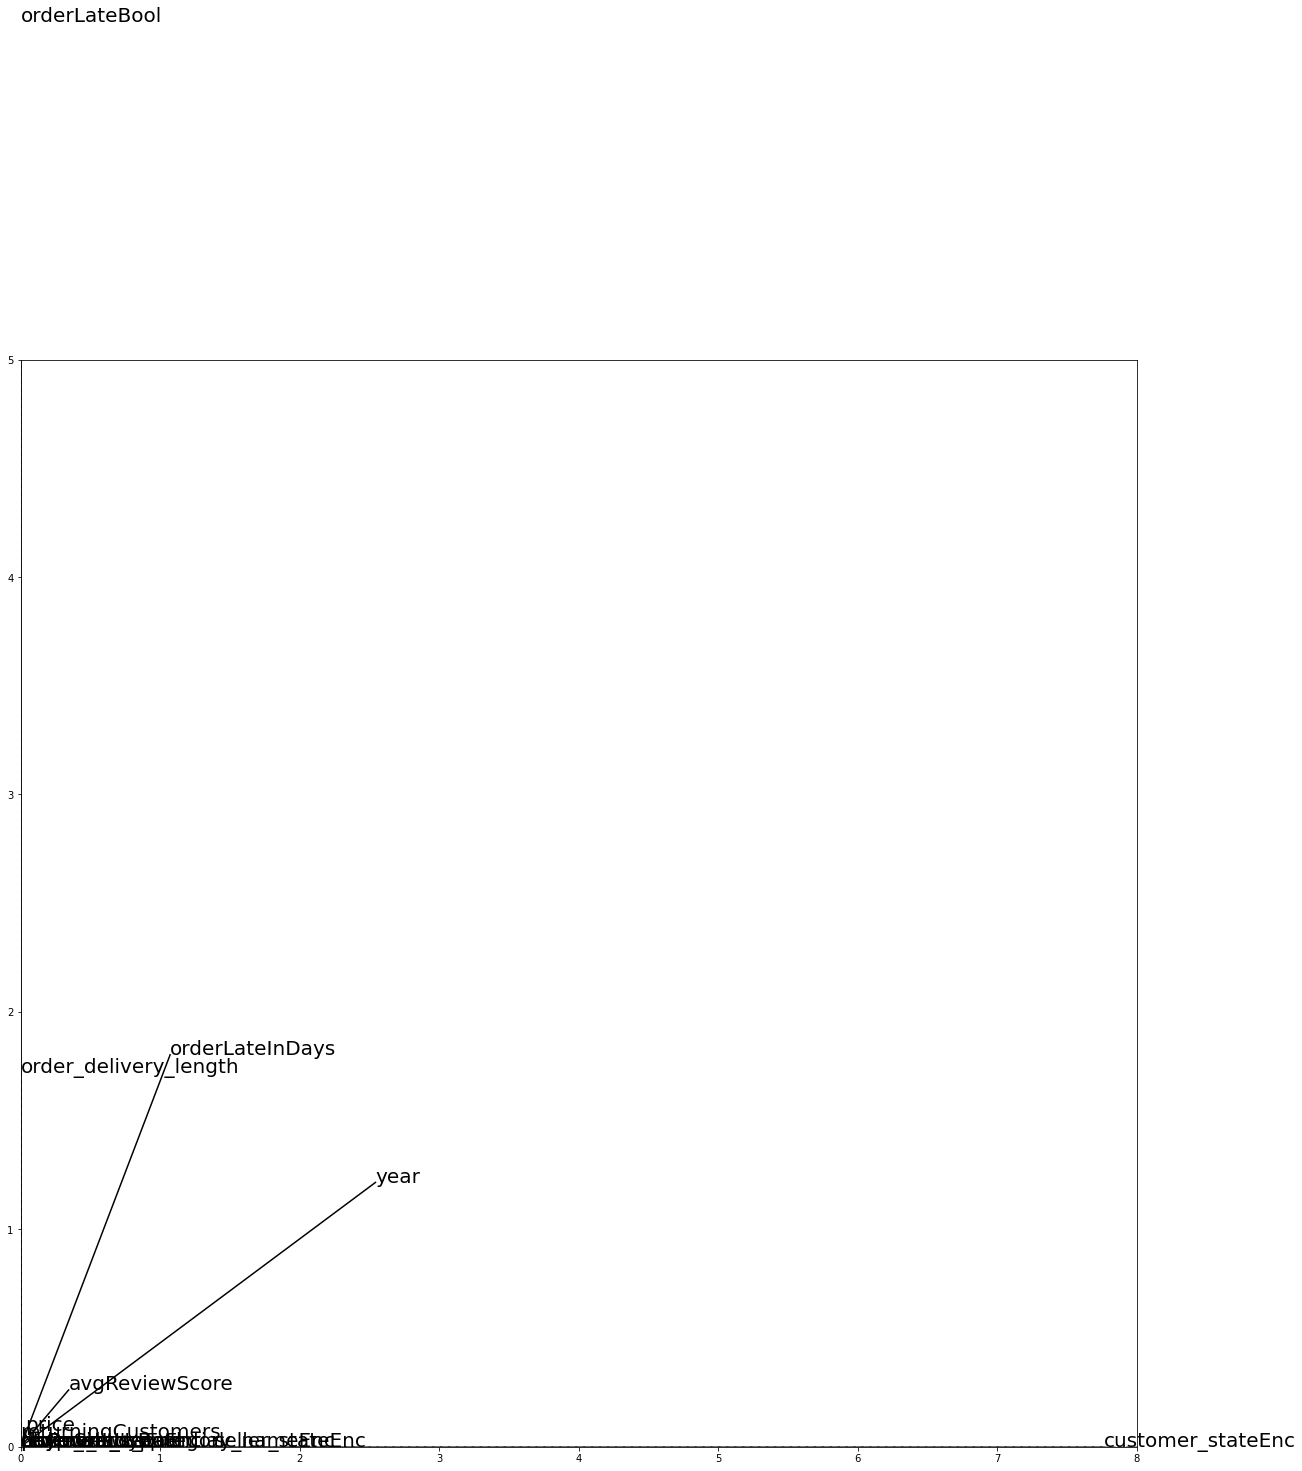

In [35]:
nmfs = nmf.components_
contribution = plt.figure(figsize=(20,20))

for i, (x, y) in enumerate(zip(nmfs[1, :], nmfs[5, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, filterC[i], fontsize='20')

# Afficher une ligne horizontale y=0
plt.plot([0, 8], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [0, 5], color='grey', ls='--')

plt.xlim([0, 8])
plt.ylim([0, 5])

# FactorAnalysis


In [36]:
from sklearn import decomposition
minMaxEncoder = preprocessing.MinMaxScaler()
X_MinMax = minMaxEncoder.fit_transform(mergedFrame1000.dropna().filter(items=filterC).values)
#print(X_MinMax.shape)
factor = decomposition.FactorAnalysis(n_components=n_components, max_iter=10000)
factor.fit(X_scaled)

#print(factor.explained_variance_ratio_)
#print(factor.explained_variance_ratio_.sum())
#print("components", factor.components_)

FactorAnalysis(max_iter=10000, n_components=7)

In [ ]:
scatter = plt.figure(figsize=(20,20))
subplotIndex = 1
n_components = 6
for c in range(n_components):
    factor = decomposition.FactorAnalysis(n_components=n_components, max_iter=10000)
    factor.fit(X_scaled)
    # projeter X sur les composantes principales
    X_factor_projected = factor.transform(X_scaled)
    #ax = scatter.add_subplot(4, 3, (c+1))
    dimension = 'PC'+str(c+1)
    #print(dimension)
    # afficher chaque observation
    for cX in range(n_components):
        if cX != c:
            ax = scatter.add_subplot(n_components, n_components, subplotIndex)
            dimensionX = 'PC'+str(cX+1)
            ax.scatter(X_factor_projected[:, cX], X_factor_projected[:, c],  alpha=0.5, marker="o",
                # colorer en utilisant la variable 'Review Score
                #c=mergedFrame1000.dropna().get('returningCustomers'))
                c=mergedFrame1000.dropna().get('orderLateBool'))
                #c=mergedFrame1000.dropna().get('product_category_nameEnc'))
            ax.set_ylabel(dimension)
            ax.set_xlabel(dimensionX)
            ax.set_xlim([-4, 6])
            ax.set_ylim([-4, 6])
            subplotIndex = subplotIndex+1
    #ax.xlim([-5.5, 5.5])
    #ax.ylim([-4, 4])
    #ax.colorbar()
    #ax.show()

# Kernel PCA

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
def my_scorer(estimator, X, y=None):
    X_reduced = estimator.transform(X)
    X_preimage = estimator.inverse_transform(X_reduced)
    return -1 * mean_squared_error(X, X_preimage)

start_time = time.time()
param_grid = [{
    "gamma": np.linspace(0.03, 0.05, 10),
    "kernel": ["linear", "poly", "rbf"]
}]

kernel = KernelPCA(fit_inverse_transform=True, n_components=n_components)
kpca = GridSearchCV(kernel, param_grid, cv=3, scoring=my_scorer)
kpca.fit(X_scaled)

print(kpca.best_params_)
print(str(time.time()-start_time))

In [ ]:
start_time = time.time()
for n_components in range(1, 6):
    scatter = plt.figure(figsize=(15,15))
    subplotIndex = 1


    for c in range(n_components):
        #print(c)
        # projeter X sur les composantes principales
        X_KPCA_projected = kpca.transform(X_scaled)

        #print(np.unique(X_KPCA_projected))
        #ax = scatter.add_subplot(4, 3, (c+1))
        dimension = 'PC'+str(c+1) + " - " + str(n_components)
        #print(dimension)
        # afficher chaque observation
        for cX in range(n_components):
            if cX != c:
                ax = scatter.add_subplot(n_components, n_components, subplotIndex)
                dimensionX = 'PC'+str(cX+1)
                ax.scatter(X_KPCA_projected[:, cX], X_KPCA_projected[:, c],
                           alpha=0.5,
                           marker="*",
                    # colorer en utilisant la variable 'Review Score ou product_category_nameEnc
                    c=mergedFrame1000.dropna().get('returningCustomers'))
                    #c=mergedFrame1000.dropna().get('orderLateBool'))
                #c=mergedFrame1000.dropna().get('product_category_nameEnc'))
                    #c=X_KPCA_projected)
                ax.set_ylabel(dimension)
                ax.set_xlabel(dimensionX)
                ax.set_xlim([-10, 25])
                ax.set_ylim([-10, 25])
                subplotIndex = subplotIndex+1
        #ax.xlim([-5.5, 5.5])
        #ax.ylim([-4, 4])
        #ax.colorbar()
        #ax.show()
print(str(time.time()-start_time))

# TSNE

Need to be fed with PCA components.

In [ ]:
time_start = time.time()
resultFrame = pd.DataFrame(columns=["tsne-2d-one", "tsne-2d-two"])

#print("columns", mergedFrame.dropna().filter(items=filterC).columns)

for n_components in range(2, 4):
    for column in filterC:
        for perpl in range(10, 50, 10):

            tsne = TSNE(n_components=n_components, verbose=1, perplexity=perpl, n_iter=250)
            tsne_results = tsne.fit_transform(X)

            resultFrame['tsne-2d-one'] = tsne_results[:,0]
            resultFrame['tsne-2d-two'] = tsne_results[:,1]


            colors = mergedFrame1000.dropna()[column].values

            title = "T SNE Visuals_"+"_"+str(n_components)+"_"+column+"_"+str(perpl)
            figure = resultFrame.plot.scatter(x="tsne-2d-one",
                                  figsize=(20,15),
                                  y="tsne-2d-two",
                                  c=colors,
                                  title=title,
                                  xlabel="tsne-2d-one",
                                  #xscale={"linear"},
                                  marker = 'o',   alpha = 0.4,
                                  colormap='viridis').get_figure()
            plt.show()
            figure.savefig("VisualsTsne/"+title+".jpg")
    print(str(time.time()-time_start))

# Kmeans

Prototype-based clustering means that each cluster is represented by a prototype, which can either be the centroid (average) of similar points with continuous features, or the medoid (the most representative or most frequently occurring point) in the case of categorical features.


While k-means is very good at identifying <b>clusters with a spherical shape</b>, one of the drawbacks of this clustering algorithm is that we have to specify the number of clusters, k, a priori. An inappropriate choice for k can result in poor clustering performance — we will discuss later in this tutorial how to choose k.

# The Elbow Method

The elbow method is a useful graphical tool to estimate the optimal number of clusters k for a given task. Intuitively, we can say that, if k increases, the within-cluster SSE (“distortion”) will decrease. This is because the samples will be closer to the centroids they are assigned to.

#### no preprocessing

In [ ]:
from sklearn.cluster import KMeans
time_start = time.time()
# calculate distortion for a range of number of cluster
distortions = []


for i in range(1, 10):
    param_grid = [{
    "n_clusters": [i],
    "max_iter": [1000],
    "tol": np.logspace(-1, 1, 5),
    "init": ["random", "k-means++"],
    "n_init": range(5, 20, 5),
    "random_state": range(0, 20, 5)
}]
    km = KMeans()
    kmElbow = GridSearchCV(km, param_grid)
    kmElbow.fit(mergedFrame1000.filter(items=filterC).dropna().sample(10000).values)
    print(i, " Best Params", kmElbow.best_params_)
    distortions.append(kmElbow.best_estimator_.inertia_)

# plot
plt.plot(range(1, 10), distortions, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()
print(str(time.time()-time_start))

### With Scaled data

In [ ]:
# calculate distortion for a range of number of cluster
distortions = []


for i in range(1, 10):
    param_grid = [{
    "n_clusters": [i],
    "max_iter": [1000],
    "tol": np.logspace(-1, 1, 5),
    "init": ["random", "k-means++"],
    "n_init": range(5, 20, 5),
    "random_state": range(0, 20, 5)
}]
    km = KMeans()
    kmElbow = GridSearchCV(km, param_grid)
    kmElbow.fit(X_MinMax[:1000])
    print(i, " Best Params", kmElbow.best_params_)
    distortions.append(kmElbow.best_estimator_.inertia_)

# plot
plt.plot(range(1, 10), distortions, marker='o')
plt.title('The Elbow Method with Standard Data')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

### Centroid

In [ ]:
from sklearn.cluster import KMeans
print(filterC)


Xkmeans = mergedFrame1000.dropna().filter(items=filterC).values

XRetungingIndexes = mergedFrame1000.dropna().filter(items=filterC).loc[mergedFrame1000["returningCustomers"] == 1].values
XNonRetungingIndexes = mergedFrame1000.dropna().filter(items=filterC).loc[mergedFrame1000["returningCustomers"] == 0].values

X_NMF_RetungingIndexes = nmf.transform(MinMaxEncoder.transform(XRetungingIndexes))
X_NMF_Non_RetungingIndexes = nmf.transform(MinMaxEncoder.transform(XNonRetungingIndexes))


print(len(X_NMF_RetungingIndexes))
print(len(Xkmeans))
print(len(X_nmf_projected))
#Xkmeans = X_delivered.dropna().filter(items=filterC).sample(1000).values
Xscaled = preprocessing.StandardScaler().fit_transform(Xkmeans)
columns = list(mergedFrame1000.dropna().filter(items=filterC).columns.values)
silhouette_coefs = []
scatter = plt.figure(figsize=(15,15))
subplotIndex = 1
clusterRange = 10

pca1 = 5
pca2 = 0
pca3 = 16

for cluster in range(2, clusterRange):
    km = KMeans(
        n_clusters=cluster,
        n_init=10,
        max_iter=1000,
        tol=10.0,
        random_state=15
    )

    #init': 'k-means++', 'max_iter': 1000, 'n_clusters': 3, 'n_init': 10, 'random_state': 15, 'tol': 10.0
    #km.fit_transform(X_factor_projected)
    y_km = km.fit_predict(X_nmf_projected)


    silhouette_coef = silhouette_score(X_nmf_projected, y_km)
    silhouette_coefs.append(silhouette_coef)
    #print([y_km == 0])
    #print(cluster, "y_km", X_nmf_projected[y_km == 0])

    # plot the n clusters
    ax = scatter.add_subplot(int(clusterRange-5), int(clusterRange-6), subplotIndex)
    for plot in range(0, cluster):
        current_cluster = plot
        #print((cluster-1), (cluster-1), subplotIndex)

        ax.scatter(
            X_nmf_projected[y_km == plot, pca1],
            X_nmf_projected[y_km == plot, pca2],
            s=20,
            #c=Xscaled[y_km == plot, 5],
            marker=markersList[plot],
            alpha=0.35,
            #facecolor="none",
            #edgecolor='black',
            label='cluster '+str(plot+1)
        )
        #ax.view_init(15, 140)
        #ax.set_xlim([-3, 3])
        #ax.set_ylim([-5, 5])
        ax.set_ylabel(str(columns[pca2]))
        ax.set_xlabel(str(columns[pca1]))
        ax.set_title("Nb Cluster "+ str(cluster))
        ax.set_label('cluster '+str(plot+1))
        # plot the centroids

        ax.scatter(X_NMF_Non_RetungingIndexes[:1000, pca1],
                   X_NMF_Non_RetungingIndexes[:1000, pca2], marker="*", color="yellow", alpha=0.3, s=5)

        ax.scatter(X_NMF_RetungingIndexes[:1000, pca1],
                   X_NMF_RetungingIndexes[:1000, pca2], marker="*", color="green", alpha=0.3, s=5)

        ax.scatter(
        km.cluster_centers_[:, pca1], km.cluster_centers_[:, pca2],
            s=100, marker='*',
            c='red', edgecolor='black',
            label='centroids'
        )
    subplotIndex = subplotIndex+1
    #plt.legend(scatterpoints=1)
    #plt.grid()
    #plt.show()

# In 3D

In [ ]:
from sklearn.cluster import KMeans
print(filterC)


Xkmeans = mergedFrame1000.dropna().filter(items=filterC).values
#Xkmeans = X_delivered.dropna().filter(items=filterC).sample(1000).values
Xscaled = preprocessing.StandardScaler().fit_transform(Xkmeans)
columns = list(mergedFrame1000.dropna().filter(items=filterC).columns.values)
silhouette_coefs = []
scatter = plt.figure(figsize=(25,25))
subplotIndex = 1
clusterRange = 10

pca1 = 10
pca2 = 12
pca3 = 16

for cluster in range(2, clusterRange):
    km = KMeans(
        n_clusters=cluster,
        init='k-means++',
        n_init=10, max_iter=1000,
        tol=1e-04, random_state=0
    )

    #km.fit_transform(X_factor_projected)
    y_km = km.fit_predict(Xscaled)
    silhouette_coef = silhouette_score(Xscaled, y_km)
    silhouette_coefs.append(silhouette_coef)
    #print(cluster, "y_km", X_nmf_projected[y_km == 0])
    # plot the n clusters
    ax = scatter.add_subplot(int(clusterRange-5), int(clusterRange-6), subplotIndex, projection='3d')
    for plot in range(0, cluster):
        current_cluster = plot
        #print((cluster-1), (cluster-1), subplotIndex)

        ax.scatter(
            Xscaled[y_km == plot, pca1],
            Xscaled[y_km == plot, pca2],
            Xscaled[y_km == plot, pca3],
            s=20, #c='lightgreen',
            marker=markersList[plot], alpha=0.35,
            #facecolor="none",
            #edgecolor='black',
            label='cluster '+str(plot+1)
        )
        ax.view_init(15, 140)
        ax.set_xlim([-2, 4])
        ax.set_ylim([-2, 4])
        ax.set_ylabel(str(columns[pca2]))
        ax.set_xlabel(str(columns[pca1]))
        ax.set_zlabel(str(columns[pca3]))
        ax.set_label('cluster '+str(plot+1))
        # plot the centroids



        ax.scatter(
        km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], km.cluster_centers_[:, 2],
            s=100, marker='*',
            c='red', edgecolor='black',
            label='centroids'
        )
    subplotIndex = subplotIndex+1
    #plt.legend(scatterpoints=1)
    #plt.grid()
    #plt.show()

# Silhouette Coef

In [ ]:
plt.plot(range(2, clusterRange), silhouette_coefs)
plt.xlabel("Nb Clusters")
plt.ylabel("Silhouette")

best nb clusters is 3

In [ ]:
#iterate with the best number of clusters according to silhouette coef
from sklearn.cluster import KMeans
print(filterC)


#Xkmeans = mergedFrame1000.dropna().filter(items=filterC).values
Xkmeans = X_delivered.dropna().filter(items=filterC).sample(5000).values
Xscaled = preprocessing.StandardScaler().fit_transform(Xkmeans)
columns = list(X_delivered.dropna().filter(items=filterC).columns.values)
scatter = plt.figure(figsize=(25,25))
subplotIndex = 1
clusterRange = 10

cluster = cluster

for pca in range(0, (len(columns)-3)):
    km = KMeans(
        n_clusters=cluster,
        init='k-means++',
        n_init=10, max_iter=1000,
        tol=1e-04, random_state=0
    )


    pca1 = 11
    pca2 = pca+2
    pca3 = pca+3
    #km.fit_transform(X_factor_projected)
    y_km = km.fit_predict(Xscaled)
    #print(cluster, "y_km", X_nmf_projected[y_km == 0])
    # plot the n clusters
    ax = scatter.add_subplot(int(clusterRange-6), int(clusterRange-6), subplotIndex, projection='3d')
    for plot in range(0, cluster):
        current_cluster = plot
        #print((cluster-1), (cluster-1), subplotIndex)

        ax.scatter(
            Xscaled[y_km == plot, pca1],
            Xscaled[y_km == plot, pca2],
            Xscaled[y_km == plot, pca3],
            s=20, #c='lightgreen',
            marker=markersList[plot], alpha=0.35,
            #facecolor="none",
            #edgecolor='black',
            label='cluster '+str(plot+1)
        )
        ax.view_init(15, 140)
        ax.set_xlim([-2, 4])
        ax.set_ylim([-2, 4])
        ax.set_ylabel(str(columns[pca2]))
        ax.set_xlabel(str(columns[pca1]))
        ax.set_zlabel(str(columns[pca3]))
        ax.set_label('cluster '+str(plot+1))
        # plot the centroids



        ax.scatter(
        km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], km.cluster_centers_[:, 2],
            s=100, marker='*',
            c='red', edgecolor='black',
            label='centroids'
        )
    subplotIndex = subplotIndex+1
    #plt.legend(scatterpoints=1)
    #plt.grid()
    #plt.show()

# DbScan Clustering


In [ ]:
from sklearn.cluster import DBSCAN

fullFrame = newCols + list(intColumn["columns"].values)
fullFrame  = fullFrame + list(floatColumn["columns"].values)
#print("Orders value", np.unique(mergedFrame1000["order_statusEnc"].values))
print("filter", fullFrame[1:20])

from matplotlib import cm
viridis = cm.get_cmap('Pastel1', 128)

#Xkmeans = mergedFrame1000.dropna().filter(items=filterC).values
#Xkmeans = X_delivered.dropna().filter(items=fullFrame[1:18]).sample(8000).values
Xkmeans = mergedFrame1000.dropna().filter(items=fullFrame[1:20]).sample(8000).values
Xscaled = preprocessing.StandardScaler().fit_transform(Xkmeans)
columns = list(mergedFrame1000.dropna().filter(items=fullFrame[1:20]).columns.values)
silhouette_coefs_dbscan = []
scatter = plt.figure(figsize=(25,25))
subplotIndex = 1
clusterRange = 30

epsRange = np.logspace(-10, 10, clusterRange)
print(epsRange)
print("columns", fullFrame[1:clusterRange])




#print(plt.cm.get_cmap("hsv", 2))

pca1 = 14
pca2 = 8
pca3 = 3

for e in epsRange:
    db = DBSCAN(
        eps=e, min_samples=10
    )
    colors = []
    #km.fit_transform(X_factor_projected)
    dbscan = db.fit(Xscaled)
    Y_dbscan = db.labels_
    #print("Y_dbscan", len(Y_dbscan))
    for y in range(len(Y_dbscan)):
        colors.append(viridis(y))


    #print(np.unique(Y_dbscan))
    if len(np.unique(Y_dbscan)) > 1:# and subplotIndex < len(fullFrame[1:17]):
        silhouette_coef = silhouette_score(Xscaled, Y_dbscan)
        silhouette_coefs_dbscan.append(silhouette_coef)
        #print(silhouette_coef)

        # plot the n clusters
        ax = scatter.add_subplot(int(clusterRange-6), int(clusterRange-6), subplotIndex, projection='3d')
        for plot in range(0, cluster):
            current_cluster = plot
            print((cluster-1), (cluster-1), subplotIndex)

            ax.scatter(
                Xscaled[:, pca1],
                Xscaled[:, pca2],
                Xscaled[:, pca3],
                s=20, #c = Y_dbscan,
                marker=markersList[plot],
                alpha=0.35,
                #facecolor="none",
                facecolor=colors,
                label='cluster '+str(plot+1)
            )
            ax.view_init(15, 140)
            ax.set_xlim([-10, 10])
            ax.set_ylim([-10, 10])
            ax.set_zlim([-10, 10])
            ax.set_ylabel(str(columns[pca2]))
            ax.set_xlabel(str(columns[pca1]))
            ax.set_zlabel(str(columns[pca3]))
            #ax.set_label('cluster '+str(plot+1))
            # plot the centroids

        subplotIndex = subplotIndex+1
    #plt.legend(scatterpoints=1)
    #plt.grid()
    #plt.show()

In [ ]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
viridis = cm.get_cmap('Blues', 128)
print(viridis(20))

# Returning Customer Caracteristics

In [ ]:
returningC = mergedFrame1000[mergedFrame1000["returningCustomers"] == 1]
NreturningC = mergedFrame1000[mergedFrame1000["returningCustomers"] == 0]

plt.scatter(NreturningC["product_category_nameEnc"], NreturningC['order_delivery_length'],
            c="lightblue", alpha=0.35,marker="*", s=NreturningC['NbReviews'].values*20,
            label="Non Returning Customer")


plt.scatter(returningC["product_category_nameEnc"], returningC['order_delivery_length'],
            c="yellow", alpha=0.35, edgecolor="black", s=returningC['NbReviews'].values*20,
            label='returning Customer')



plt.ylabel("Durée de livraison")
plt.xlabel("Type de Produit")
plt.legend(scatterpoints=1)

In [ ]:
returningC = mergedFrame1000[mergedFrame1000["returningCustomers"] == 1]
NreturningC = mergedFrame1000[mergedFrame1000["returningCustomers"] == 0]

plt.scatter(NreturningC["NbReviews"], NreturningC['order_delivery_length'],
            c="lightblue", alpha=0.35,marker="*", s=NreturningC['price'].values,
            label="Non Returning Customer")


plt.scatter(returningC["NbReviews"], returningC['order_delivery_length'],
            c="yellow", alpha=0.35, edgecolor="black", s=returningC['price'].values,
            label='returning Customer')



plt.ylabel("Durée de livraison")
plt.xlabel("Nombre de Reviews")
plt.legend(scatterpoints=1)

In [ ]:
returningC = mergedFrame1000[mergedFrame1000["returningCustomers"] == 1]
NreturningC = mergedFrame1000[mergedFrame1000["returningCustomers"] == 0]

plt.figure(figsize=(20,20))

plt.scatter(NreturningC["price"], NreturningC['order_delivery_length'], s=NreturningC['NbReviews']*100, #projection='3d',
            c="lightblue", alpha=0.35,marker="*",# s=NreturningC['NbReviews'].values*20,
            label="Non Returning Customer")


plt.scatter(returningC["price"], returningC['order_delivery_length'], s=returningC['NbReviews']*100 , #projection='3d',
            c="yellow", alpha=0.35, edgecolor="black", #s=returningC['NbReviews'].values*20,
            label='returning Customer')



plt.ylabel("Durée de livraison")
plt.xlabel("Prix")
plt.legend(scatterpoints=1)

# Old method for feature engineering

In [ ]:
#add NbOrders - much slower
start_time = time.time()
customerIds = mergedFrame1000["customer_unique_id"].values
nbOrders = []
for ids in customerIds:
    idx = mergedFrame1000["customer_unique_id"].loc[mergedFrame1000["customer_unique_id"] == ids]
    orders = mergedFrame1000["order_id"].iloc[idx.index.values]
    uniqueOrders = np.unique(orders.values)
    nbOrders.append(len(uniqueOrders))
mergedFrame1000["nbOrders"] = nbOrders
print(str(time.time()-start_time))

In [ ]:
#add avgReviewScore - with iterrows
start_time = time.time()
customerIds = mergedFrame1000["customer_unique_id"].values
avgReviewScore = []
for index, row in mergedFrame1000.iterrows():
    currentCustomer = row["customer_unique_id"]
    if row["NbReviews"] >=1:
        currentCustomerRows = mergedFrame1000["customer_unique_id"].loc[mergedFrame1000["customer_unique_id"] == currentCustomer]
        filters = mergedFrame1000.iloc[currentCustomerRows.index.values]
        #print(np.unique(currentCustomerRows.index.values))
        avgScore = np.average(filters["review_score"])
        #print(index, avgScore)
        avgReviewScore.append(avgScore)
    else:
        avgReviewScore.append(0)
mergedFrame1000["avgReviewScore"] = avgReviewScore
print(str(time.time()-start_time))

